# DTSA 5510 Final Project

## Imports

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

from langdetect import detect

## Data import

In [2]:
reviews = pd.read_csv('data/reviews.csv')

In [3]:
reviews.head()

,ID,REVIEW_DATE,IS_VERIFIED,RATING,REVIEW_TITLE,REVIEW_TEXT,NAME
0,3129911,2022-08-17,True,1,This has NO flavor,"This item has no flavor, several people have t...",United States
1,2702184,2022-06-07,True,1,Different formula,I have used this brand of sunscreen for about ...,United States
2,760128,2014-06-03,True,5,Vitex!!!,Have been using these for at least 20 months a...,United States
3,760140,2013-11-24,True,5,Stopping hair loss,Bought this to help fight hair loss along with...,United States
4,760132,2014-04-10,True,5,coming off of birth control,this company is one of the best most honest i'...,United States


In [4]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            10000 non-null  int64 
 1   REVIEW_DATE   10000 non-null  object
 2   IS_VERIFIED   10000 non-null  bool  
 3   RATING        10000 non-null  int64 
 4   REVIEW_TITLE  9999 non-null   object
 5   REVIEW_TEXT   10000 non-null  object
 6   NAME          10000 non-null  object
dtypes: bool(1), int64(2), object(4)
memory usage: 478.6+ KB


### Changing NAME field to Country

In [5]:
reviews.rename(columns={'NAME': 'COUNTRY'}, inplace = True)

### Dropping the row with the one null value

In [6]:
reviews[reviews['REVIEW_TITLE'].isnull()]

,ID,REVIEW_DATE,IS_VERIFIED,RATING,REVIEW_TITLE,REVIEW_TEXT,COUNTRY
2517,3566087,2018-08-09,True,5,NaN,Excellent product that is really helping my dog,United States


In [7]:
reviews.dropna(subset = ['REVIEW_TITLE'], axis = 0, inplace = True)

In [8]:
reviews.isnull().sum()

ID              0
REVIEW_DATE     0
IS_VERIFIED     0
RATING          0
REVIEW_TITLE    0
REVIEW_TEXT     0
COUNTRY         0
dtype: int64

In [9]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            9999 non-null   int64 
 1   REVIEW_DATE   9999 non-null   object
 2   IS_VERIFIED   9999 non-null   bool  
 3   RATING        9999 non-null   int64 
 4   REVIEW_TITLE  9999 non-null   object
 5   REVIEW_TEXT   9999 non-null   object
 6   COUNTRY       9999 non-null   object
dtypes: bool(1), int64(2), object(4)
memory usage: 556.6+ KB


### Converting REVIEW_DATE field to pandas datetime

In [10]:
reviews.head()

,ID,REVIEW_DATE,IS_VERIFIED,RATING,REVIEW_TITLE,REVIEW_TEXT,COUNTRY
0,3129911,2022-08-17,True,1,This has NO flavor,"This item has no flavor, several people have t...",United States
1,2702184,2022-06-07,True,1,Different formula,I have used this brand of sunscreen for about ...,United States
2,760128,2014-06-03,True,5,Vitex!!!,Have been using these for at least 20 months a...,United States
3,760140,2013-11-24,True,5,Stopping hair loss,Bought this to help fight hair loss along with...,United States
4,760132,2014-04-10,True,5,coming off of birth control,this company is one of the best most honest i'...,United States


In [11]:
reviews['REVIEW_DATE'] = pd.to_datetime(reviews['REVIEW_DATE'])

### Converting ID field to type object

In [12]:
reviews['ID'] = reviews['ID'].astype(object)

In [13]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID            9999 non-null   object        
 1   REVIEW_DATE   9999 non-null   datetime64[ns]
 2   IS_VERIFIED   9999 non-null   bool          
 3   RATING        9999 non-null   int64         
 4   REVIEW_TITLE  9999 non-null   object        
 5   REVIEW_TEXT   9999 non-null   object        
 6   COUNTRY       9999 non-null   object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(4)
memory usage: 556.6+ KB


In [14]:
reviews.describe()

,REVIEW_DATE,RATING
count,9999,9999.000000
mean,2019-05-12 18:08:27.650765056,3.708071
min,2000-06-17 00:00:00,1.000000
25%,2016-11-07 00:00:00,2.000000
50%,2020-01-06 00:00:00,5.000000
75%,2022-08-11 00:00:00,5.000000
max,2024-06-17 00:00:00,5.000000
std,NaN,1.625120


## Visualizations

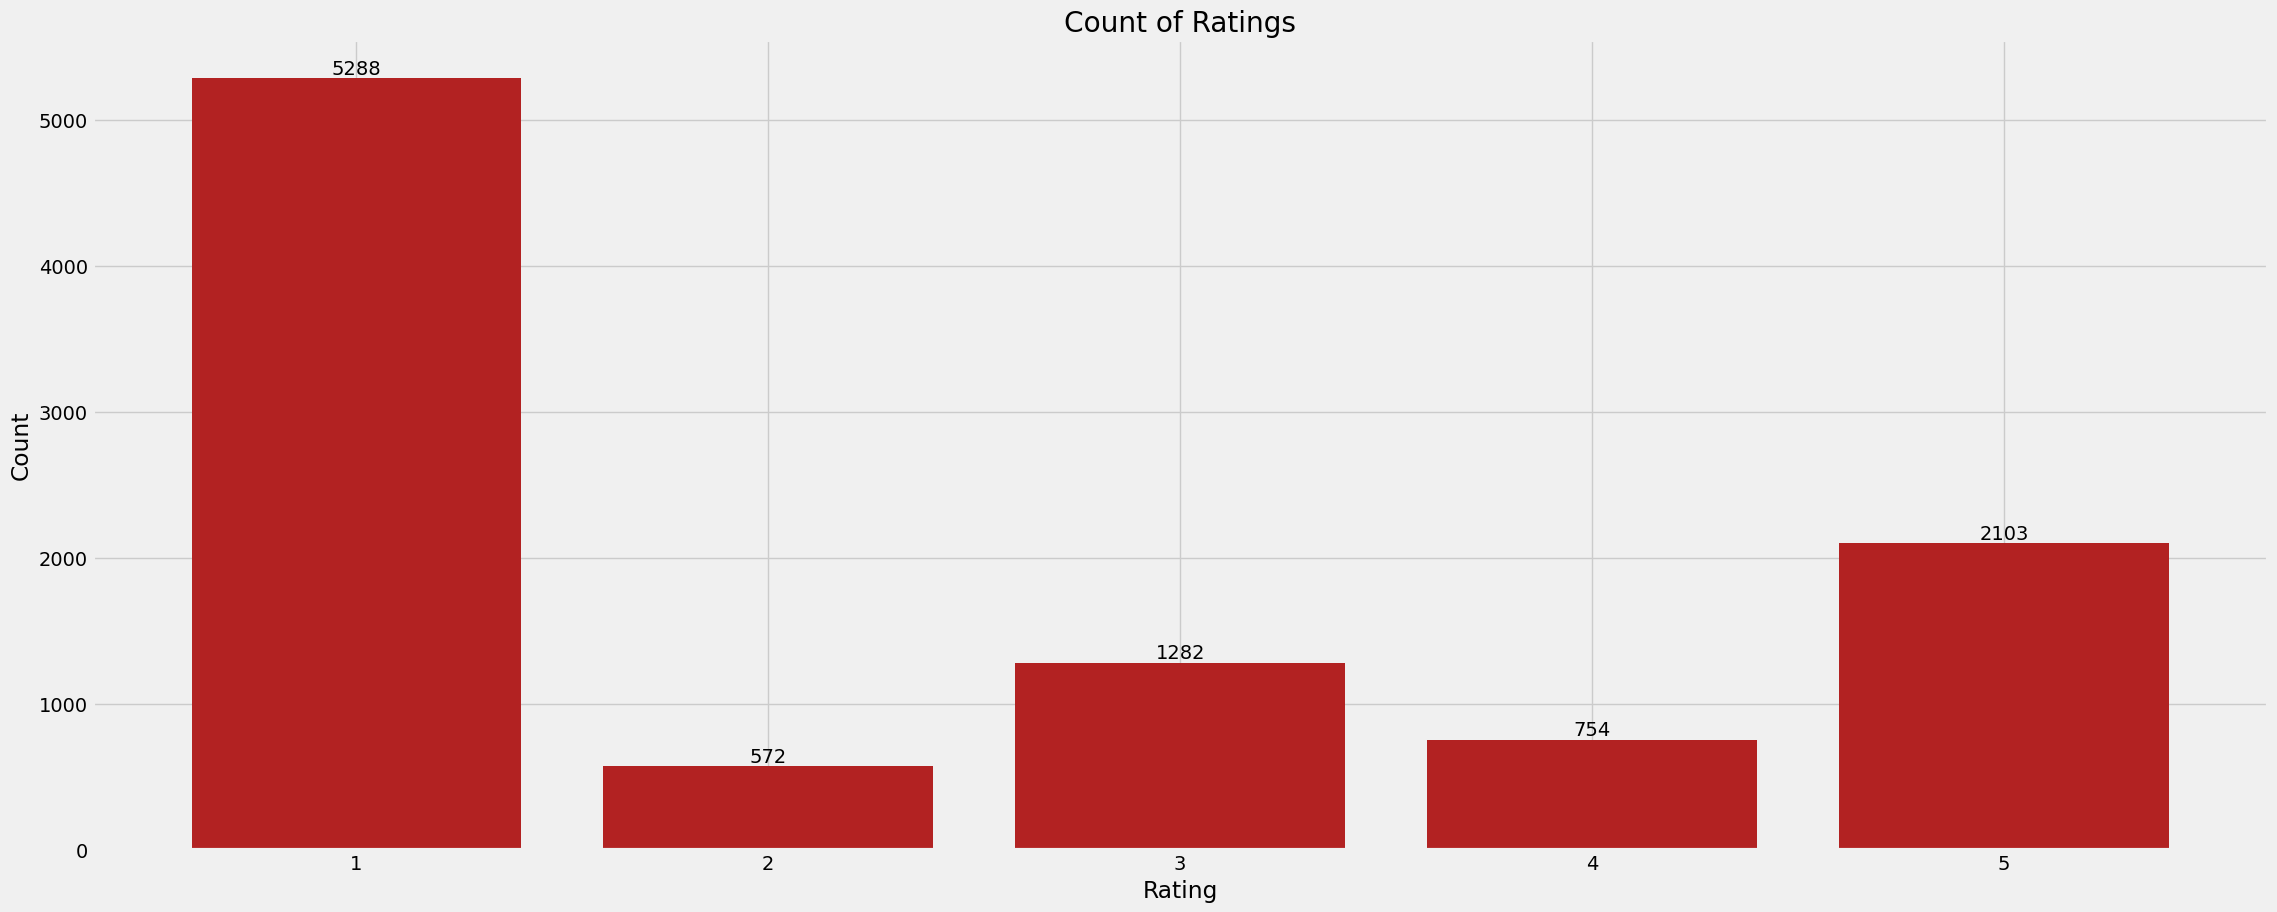

In [15]:
plt.style.use('fivethirtyeight')
fix, ax = plt.subplots(figsize = (25, 10))

ratings = reviews['RATING'].value_counts()
ind = reviews['RATING'].unique()

plt.bar(ind, ratings, color = 'firebrick', align = 'center')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height(),
            '{:.0f}'.format(p.get_height()),
            ha='center',
            va='bottom'
           )

plt.title('Count of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [16]:
# dataset is unbalanced, but that is ok in our context as we will not be exploring the relationship between variables, just the underlying text

In [17]:
reviews.head()

,ID,REVIEW_DATE,IS_VERIFIED,RATING,REVIEW_TITLE,REVIEW_TEXT,COUNTRY
0,3129911,2022-08-17,True,1,This has NO flavor,"This item has no flavor, several people have t...",United States
1,2702184,2022-06-07,True,1,Different formula,I have used this brand of sunscreen for about ...,United States
2,760128,2014-06-03,True,5,Vitex!!!,Have been using these for at least 20 months a...,United States
3,760140,2013-11-24,True,5,Stopping hair loss,Bought this to help fight hair loss along with...,United States
4,760132,2014-04-10,True,5,coming off of birth control,this company is one of the best most honest i'...,United States


## Removing non-english reviews

In [46]:
def detect_language(text):
    try:
        lang = detect(text)
    except:
        lang = 'unknown'
    return lang

In [47]:
reviews['language'] = reviews['REVIEW_TEXT'].apply(detect_language)

In [49]:
reviews['language'].value_counts()

language
en         9602
es          105
de           74
ja           63
fr           58
it           35
pt           11
ca            9
af            8
ro            6
nl            5
so            5
no            5
da            3
id            2
sl            2
et            2
unknown       1
tl            1
cy            1
tr            1
Name: count, dtype: int64

In [50]:
english_mask = reviews['language'] == 'en'
english_reviews = reviews[english_mask]

In [18]:
english_reviews['word_count'] = english_reviews['REVIEW_TEXT'].apply(lambda x: len(x.split()))

Text(0.5, 1.0, 'Number of words by review histogram')

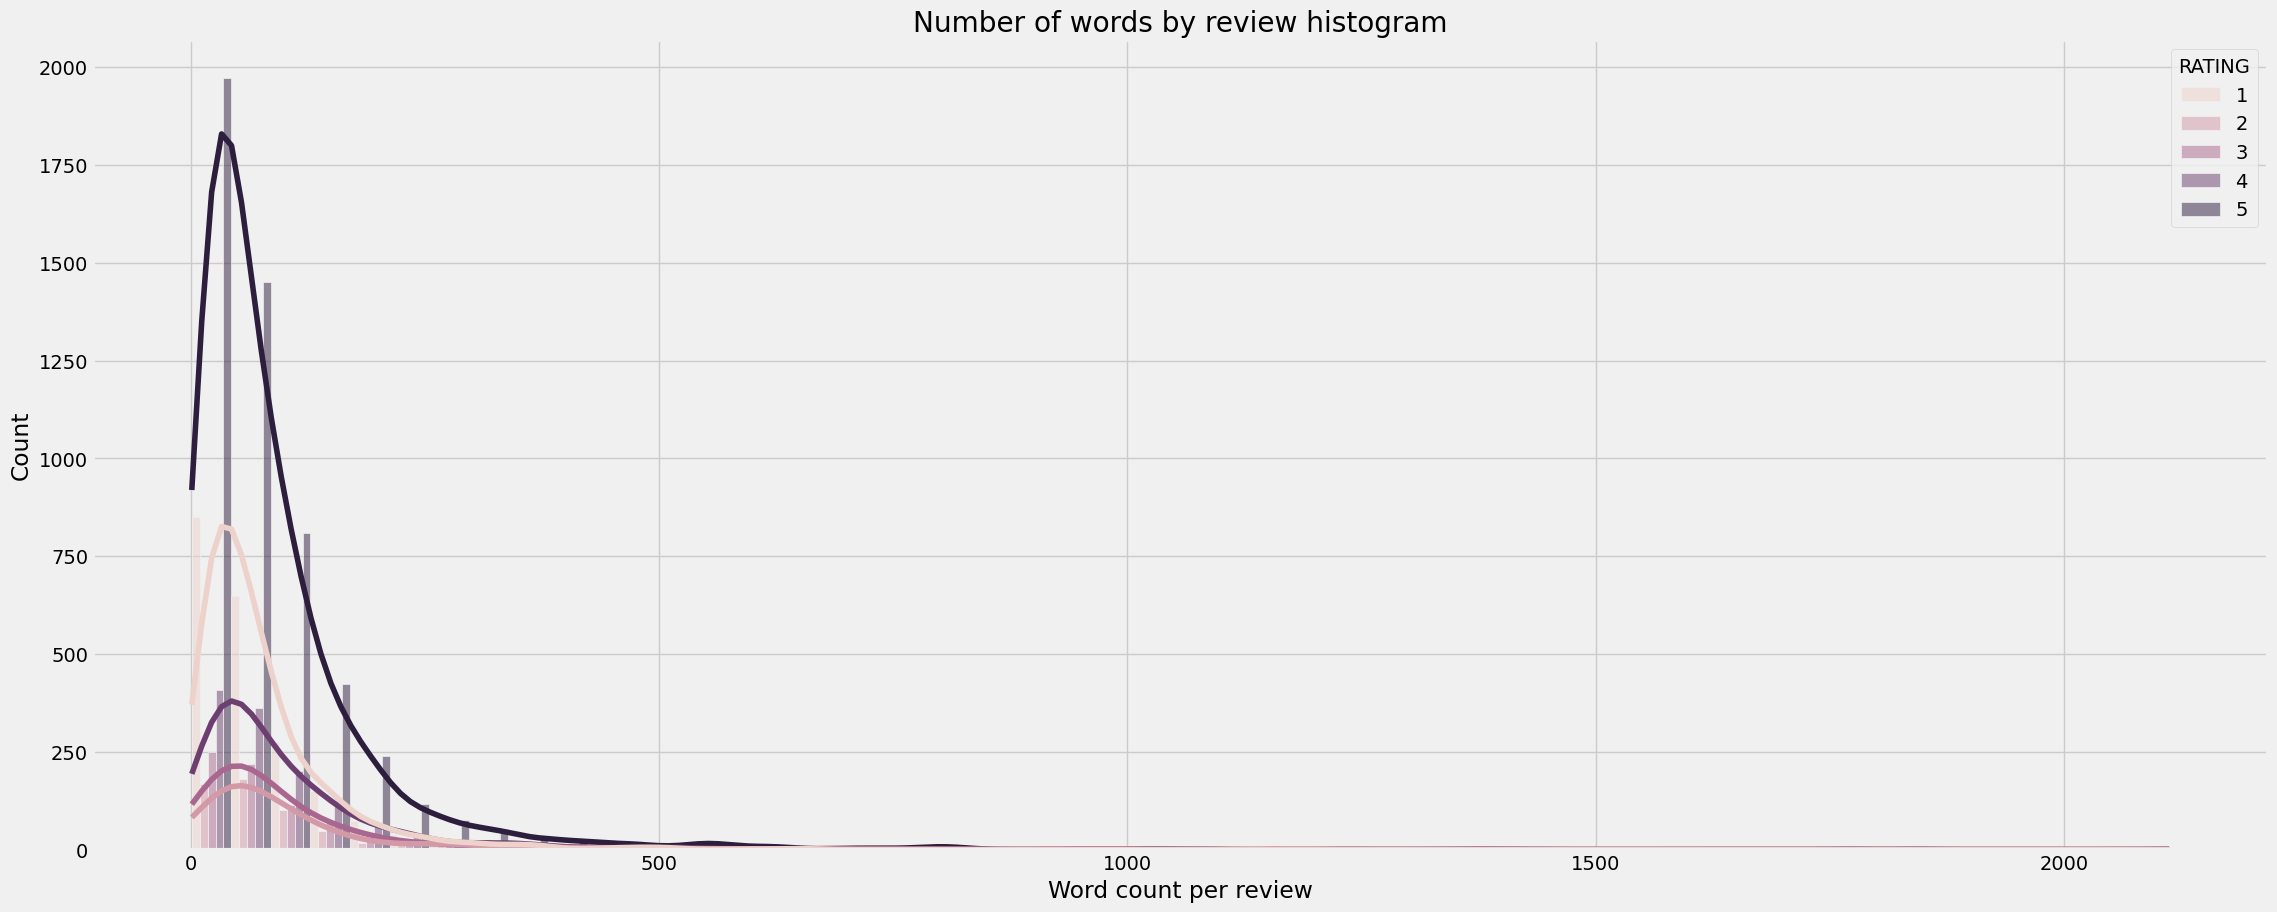

In [19]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (25, 10))

sns.histplot(data=english_reviews, x='word_count', hue='RATING', multiple='dodge', legend='RATING', kde = True, bins = 50)

plt.xlabel('Word count per review')
plt.ylabel('Count')
plt.title('Number of words by review histogram')

/var/folders/lr/994tkpld58q9sbf0jsds90h80000gn/T/ipykernel_44168/4076573839.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(data, labels = reviews['RATING'].unique(), patch_artist=True)


Text(0, 0.5, 'Word count')

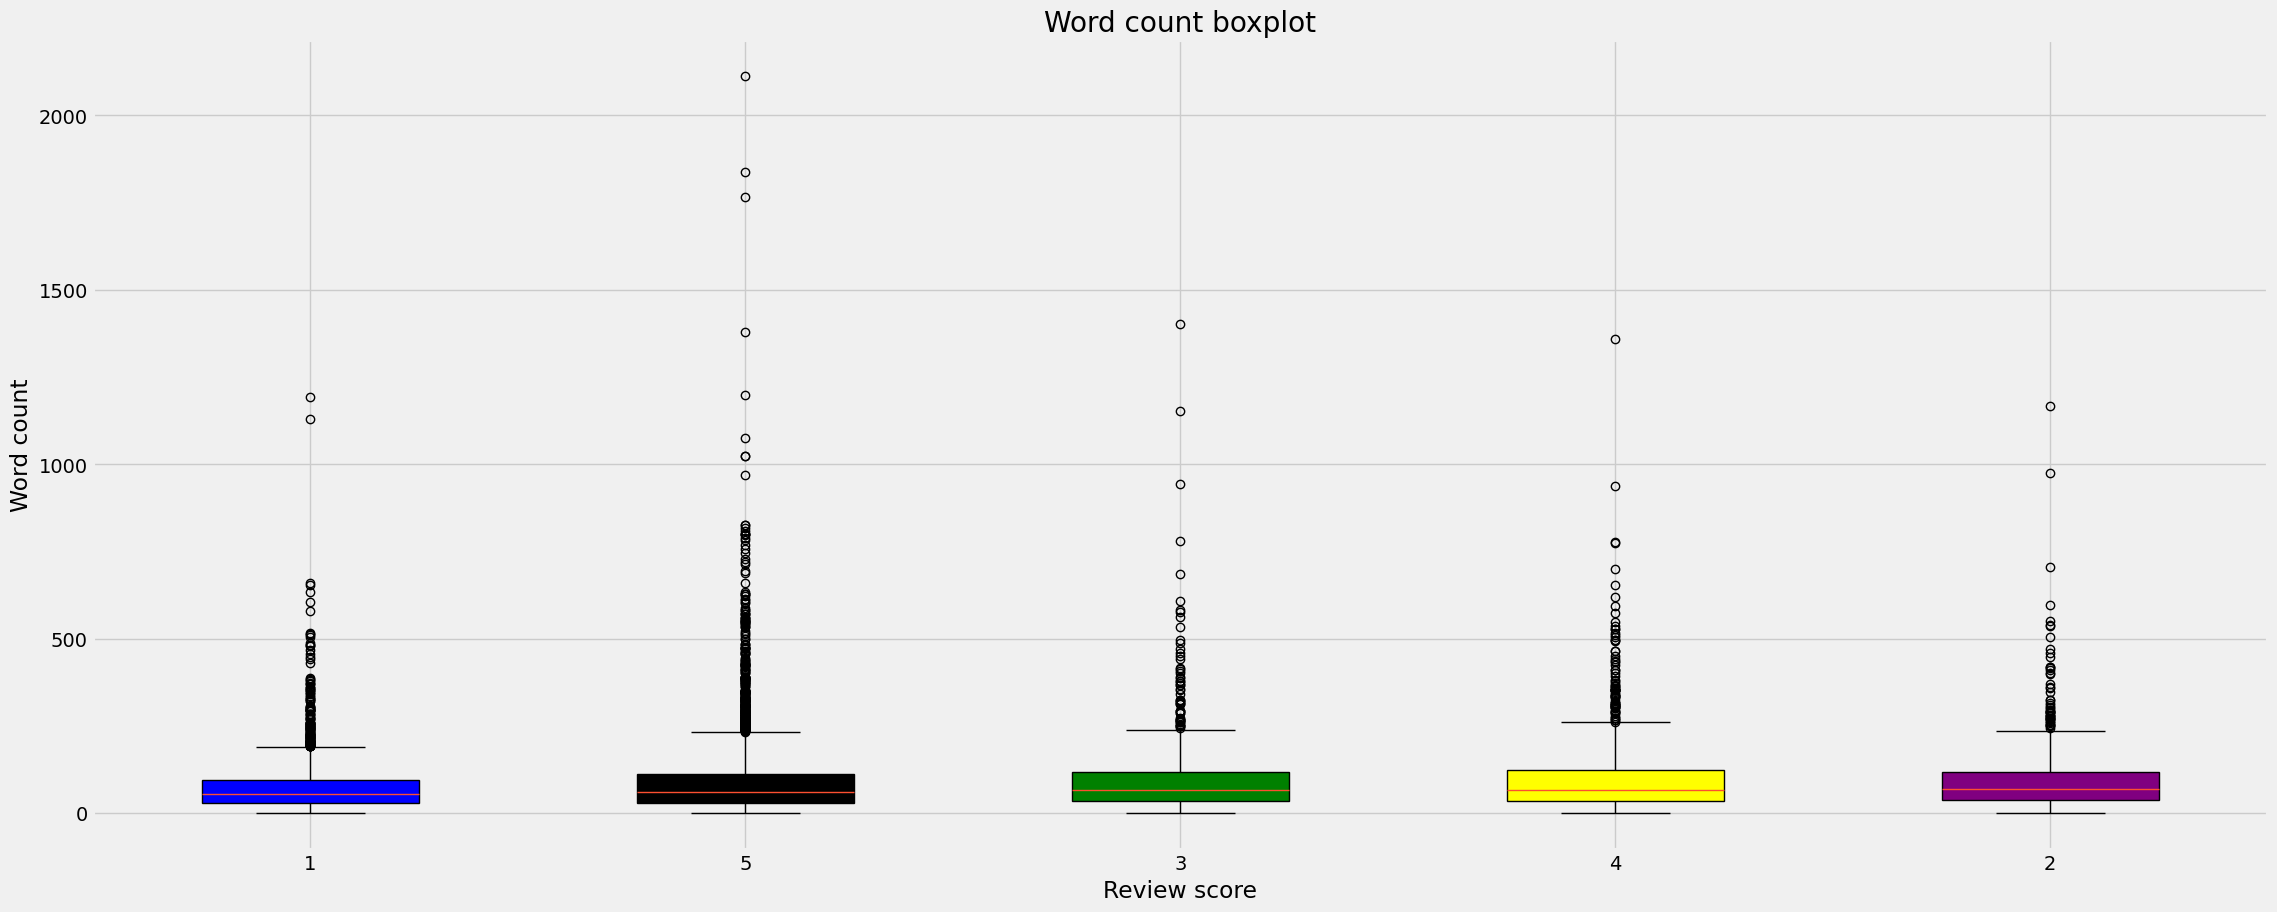

In [20]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (25, 10))

wc_group = english_reviews.groupby('RATING')['word_count'].apply(list)
data = [wc_group[cat] for cat in english_reviews['RATING'].unique()]

bp = plt.boxplot(data, labels = english_reviews['RATING'].unique(), patch_artist=True)

colors = ['blue', 'black', 'green', 'yellow', 'purple']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Word count boxplot')
plt.xlabel('Review score')
plt.ylabel('Word count')

# Train Test Split

In [21]:
english_reviews.sample(5)

,ID,REVIEW_DATE,IS_VERIFIED,RATING,REVIEW_TITLE,REVIEW_TEXT,COUNTRY,word_count
9179,8521977,2021-07-26,True,1,Something’s missing….,"This is not giftable, not sturdy, and not wort...",Australia,19
4511,7598653,2018-12-09,True,3,Mixed,Love the fan but no light!!!:/,United States,6
3860,7538470,2013-09-23,True,5,Starting to feel better now.,I bought this by referral of my doctor for som...,United States,52
1558,4289510,2023-02-17,True,5,Great 2.1 400watt Speaker setup for Desktops,"This setup packs a good sound. For its price, ...",United States,572
2790,5461489,2009-06-22,False,1,How to destroy a company...,DeWalt is apparently challenged by the dauntin...,United States,171


In [22]:
english_reviews_train, english_reviews_test = train_test_split(english_reviews, test_size=0.20, random_state=42)

In [24]:
print(f'The number of rows in the training dataset is: {len(english_reviews_train)}')

The number of rows in the training dataset is: 7999


In [25]:
print(f'The number of rows in the testing dataset is: {len(english_reviews_test)}')

The number of rows in the testing dataset is: 2000


In [28]:
y = english_reviews_train['RATING'].tolist()
english_reviews_train_text = english_reviews_train['REVIEW_TEXT']

# Implementing TF-IDF

In [29]:
tfidf = TfidfVectorizer(ngram_range =(1,2), stop_words = 'english')
features = tfidf.fit_transform(english_reviews_train_text)
df_tfidf = pd.DataFrame(features.toarray(), columns = tfidf.get_feature_names_out())

In [39]:
# original review
english_reviews_train.iloc[2]['REVIEW_TEXT']

"OK - the nut butter itself is awesome. No sugar, just nuts and some palm kernel oil. I travel a lot and have specific dietary needs so I was super excited about these. It's the only way I've been able to get nut butter past airport security - usually they confiscate if I take in a tupperware.The con about this product is that a bunch of the nut butter never gets squeezed out so I have to slice them open and scrape out the good stuff. Love the brand but will probably stick to the jars in the future."

In [30]:
df_tfidf_three  = df_tfidf.iloc[2]
sorted_doc_three_scores = df_tfidf_three.sort_values(ascending=False)

In [40]:
sorted_doc_three_scores[:20]

nut butter               0.340780
nut                      0.261056
butter                   0.231413
oil travel               0.118775
confiscate tupperware    0.118775
gets squeezed            0.118775
just nuts                0.118775
nuts palm                0.118775
security usually         0.118775
product bunch            0.118775
tupperware product       0.118775
confiscate               0.118775
specific dietary         0.118775
butter awesome           0.118775
jars future              0.118775
bunch nut                0.118775
scrape good              0.118775
tupperware               0.118775
needs super              0.118775
ok nut                   0.118775
Name: 2, dtype: float64

Text(0.5, 0, 'Terms')

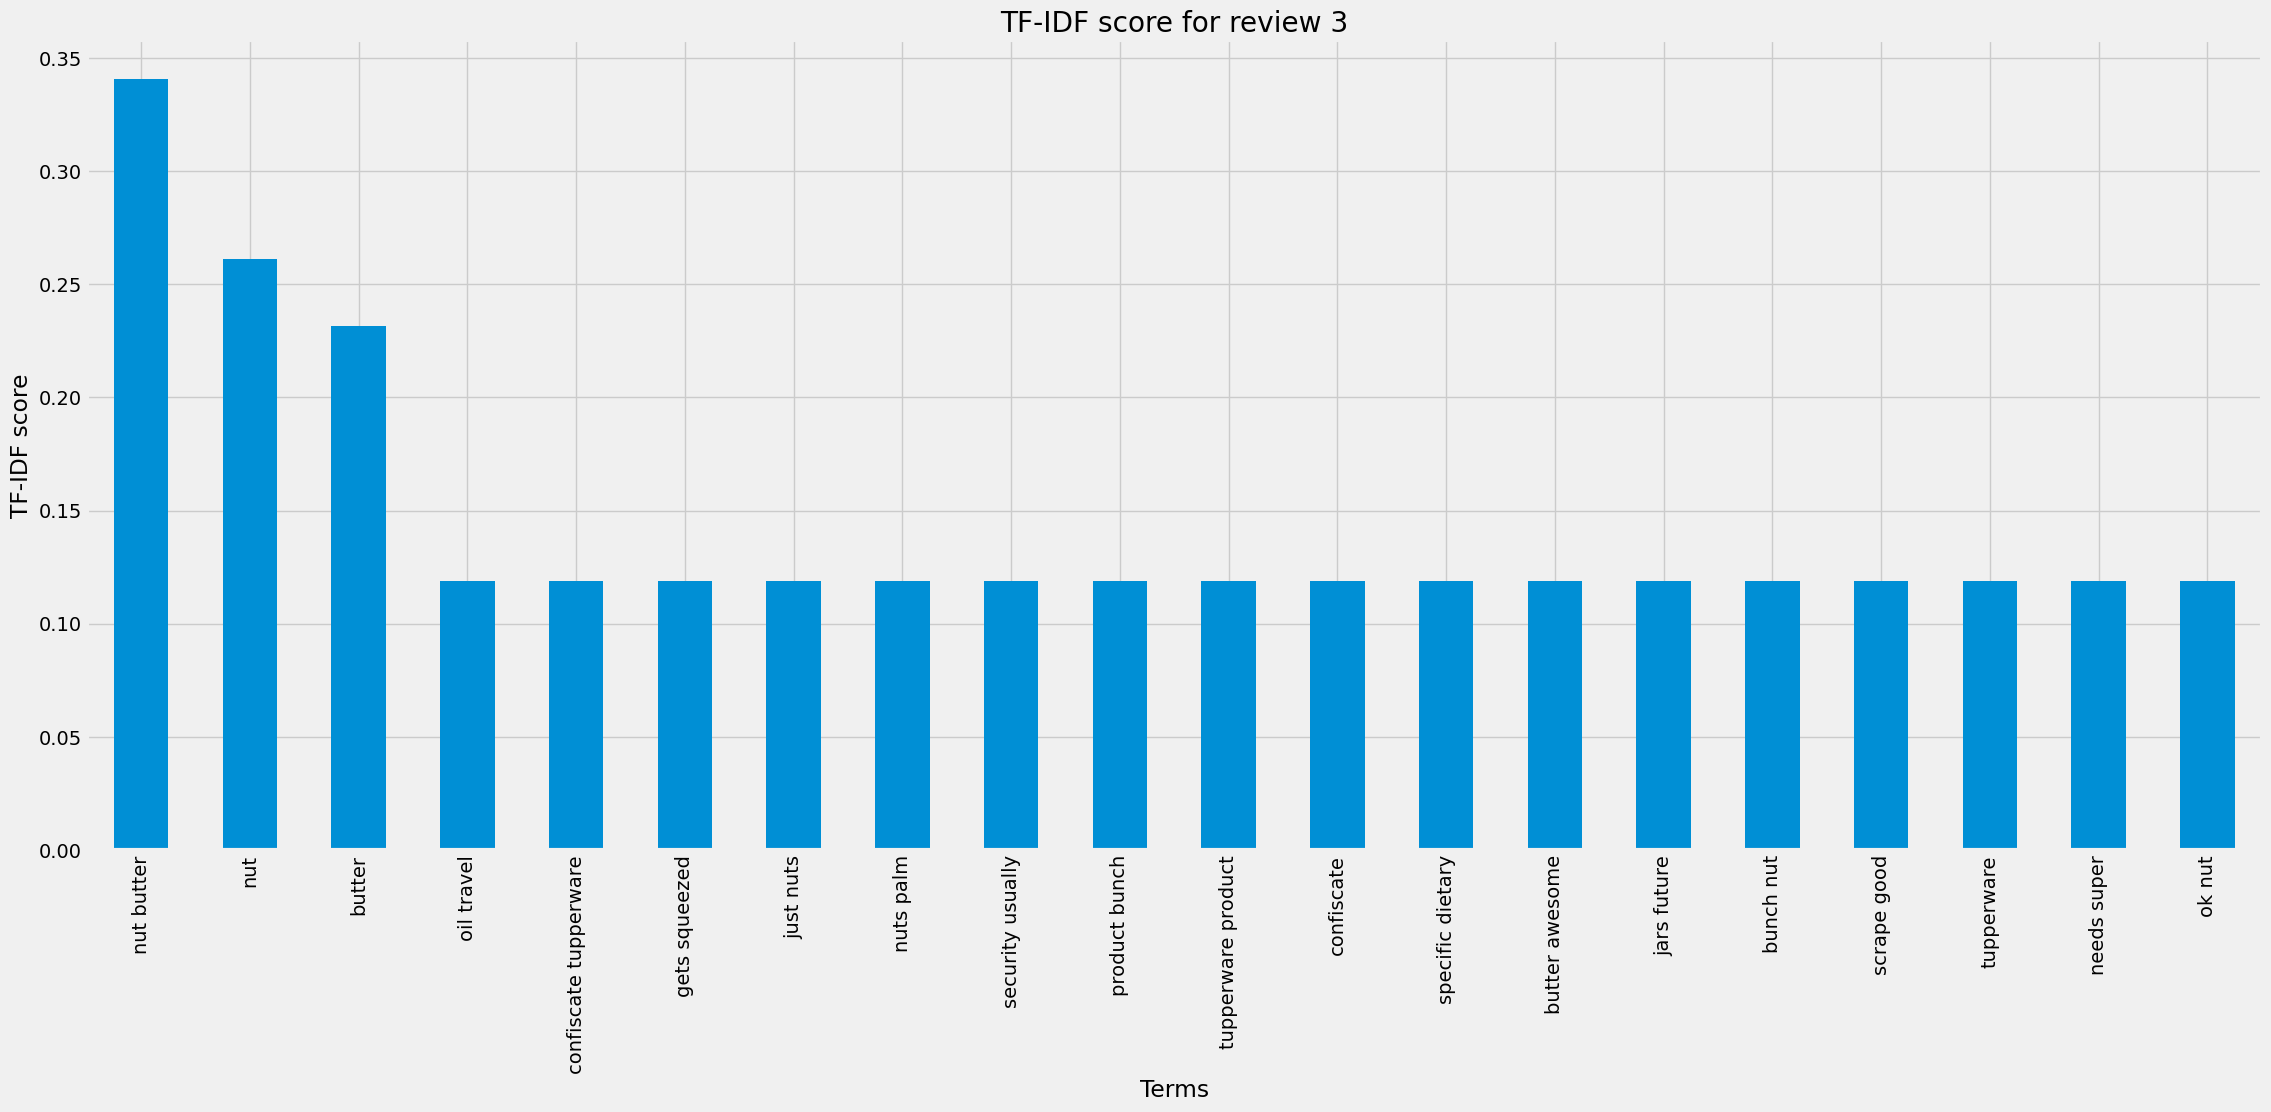

In [33]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (25, 10))

sorted_doc_three_scores[:20].plot(kind = 'bar')
plt.title('TF-IDF score for review 3')
plt.ylabel('TF-IDF score')
plt.xlabel('Terms')

In [43]:
reviews_train[reviews_train['REVIEW_TEXT'] == reviews_train['REVIEW_TEXT'].max()]

,ID,REVIEW_DATE,IS_VERIFIED,RATING,REVIEW_TITLE,REVIEW_TEXT,COUNTRY,word_count
731,4459217,2023-04-03,True,1,Contains OCTOCRYLENE 6.0%,🤬 This is not reef friendly. NO It doesn't co...,United States,108


In [44]:
reviews_test[reviews_test['REVIEW_TEXT'] == reviews_test['REVIEW_TEXT'].max()]

,ID,REVIEW_DATE,IS_VERIFIED,RATING,REVIEW_TITLE,REVIEW_TEXT,COUNTRY,word_count
6073,8596004,2016-02-20,True,4,香りもきちんと,認知症予防に毎日コーヒーに入れて溶かして飲んでいます。色々なココナッツオイルも試しましたが、...,United States,1


# Unsupervised model

In [ ]:
model_nmf = NMF()